# Integrantes:
### Marcelo Pedral Mota - 202200014355
### Matheus Araujo Pereira - 202100114080
### Gabriel Teixeira Silveira - 202100011987

## Inicialmente resolver imports e o caminho do dataset csv no meu diretório
### _Nesse caso o csv foi guardado num caminho ./datasets/evasao/evasao.csv_

In [2]:
import os
import pandas as pd
import numpy as np
import sklearn as sk

# Resolvendo o caminho para o arquivo csv e guardar em csv_file
base_dir = os.getcwd()
csv_file = os.path.join(base_dir, "datasets", "evasao", "evasao.csv")

# Lendo o CSV
evasao = pd.read_csv(csv_file)

### Agora com o arquivo carregado para entender o problema eu vou analisar as primeiras linhas, e depois analisar informações com relação as colunas

In [3]:
# Imprime as 5 primeiras linhas da tabela
evasao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   curriculum_id                  2603 non-null   int64  
 1   student_id                     2603 non-null   int64  
 2   centro                         2603 non-null   object 
 3   department_name                2603 non-null   object 
 4   course_name                    2603 non-null   object 
 5   student_age_at_initial_period  2603 non-null   int64  
 6   birthday                       2603 non-null   object 
 7   birth_place                    2600 non-null   object 
 8   ingress_form                   2603 non-null   object 
 9   locks_number                   2603 non-null   int64  
 10  required_ch_progress           2603 non-null   float64
 11  optative_ch_progress           2603 non-null   float64
 12  curriculum_status              2603 non-null   o

In [4]:
# Imprime 
# evasao.info()
evasao['leaving_reason'].value_counts()

leaving_reason
ABANDONO                                                                               730
CONCLUÍDO                                                                              329
CANC.. NOVO VESTIBULAR                                                                 143
Transferência Interna                                                                  122
CANCELAMENTO ESPONTÂNEO                                                                 76
DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO                                           73
Não atendeu à convocação para o Cadastro Específico conforme Edital 21/2017/PROGRAD     35
TRANSF.P/OUTRA IES                                                                       4
CADASTRO CANCELADO                                                                       3
NÃO CONFIRMAÇÃO VÍNCULO                                                                  2
Name: count, dtype: int64

### Primeiro vou verificar as colunas que não são númericas, o python marcar como object mas como vem de um arquivo csv provavelmente são strings, a ideia é entender se são atributos categóricos e realizar transformações

In [5]:
# utilizando values_counts() para quais são os valores e quantas repetições
# evasao['centro'].value_counts()
# evasao['department_name'].value_counts()
# evasao['course_name'].value_counts()
# evasao['birthday'].value_counts()
# evasao['birth_place'].value_counts()
# evasao['ingress_form'].value_counts()
evasao['curriculum_status'].value_counts()
# evasao['leaving_reason'].value_counts()

curriculum_status
CANCELADO                      1188
ATIVO                          1004
CONCLUÍDO                       329
TRANCADO                         61
FORMANDO                         12
Índices Acadêmicos                8
Ano/Período Letivo Inicial:       1
Name: count, dtype: int64

In [6]:
# é possível perceber que os dados são nichados e para reduzir o trabalho vou descartar algumas colunas no momento
evasao_reduzido = evasao.drop(columns=["curriculum_id","student_id","centro", "department_name","birthday", "leaving_reason"])
evasao_reduzido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2603 non-null   object 
 1   student_age_at_initial_period  2603 non-null   int64  
 2   birth_place                    2600 non-null   object 
 3   ingress_form                   2603 non-null   object 
 4   locks_number                   2603 non-null   int64  
 5   required_ch_progress           2603 non-null   float64
 6   optative_ch_progress           2603 non-null   float64
 7   curriculum_status              2603 non-null   object 
 8   mc                             2603 non-null   float64
 9   course_mc                      2603 non-null   float64
 10  iepl                           2603 non-null   float64
 11  course_iepl                    2603 non-null   float64
 12  iech                           2603 non-null   f

<module 'matplotlib' from '/home/motamarcelo/jupyter-env/lib/python3.12/site-packages/matplotlib/__init__.py'>

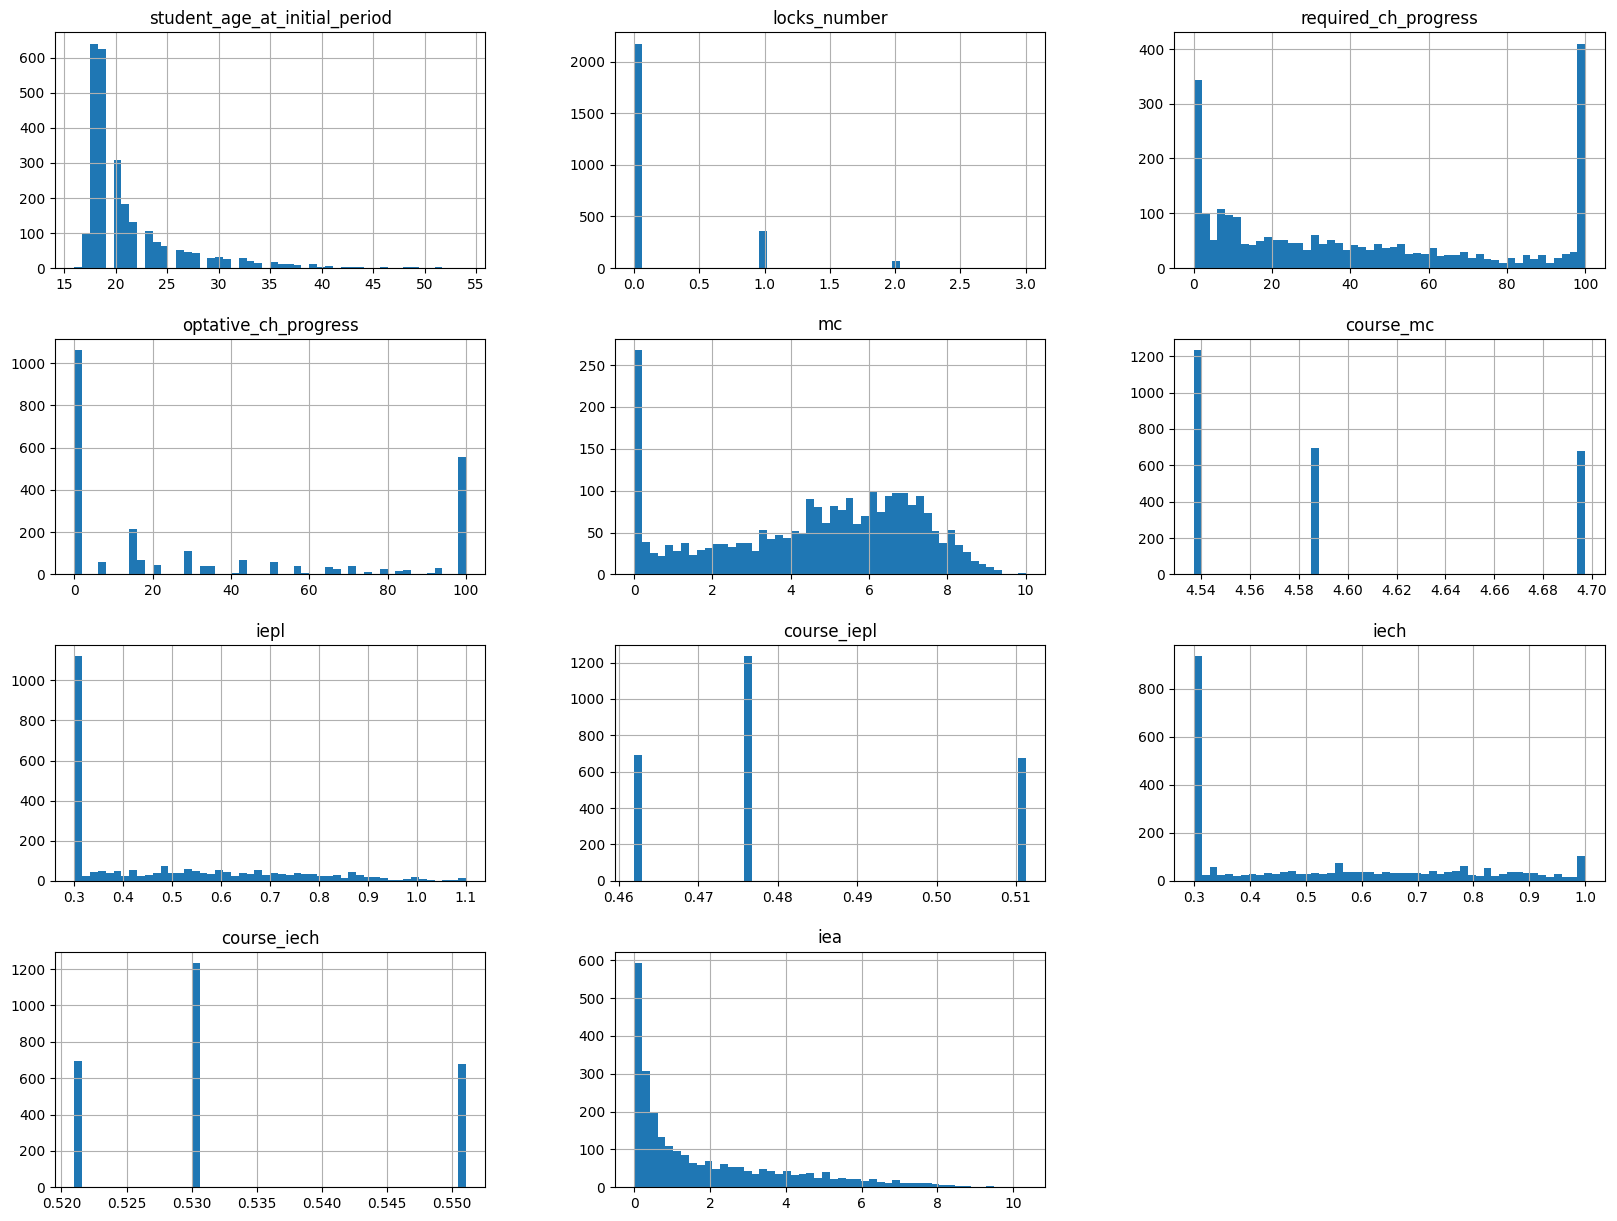

In [7]:
%matplotlib inline
import matplotlib as plt
evasao_reduzido.hist(bins=50, figsize=(20,15))
plt

#### Tentado entender quais são as opções de curriculum_status

In [8]:
filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'FORMANDO']
## filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'Ano/Período Letivo Inicial:']
## filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'Índices Acadêmicos']

filtro

,course_name,student_age_at_initial_period,birth_place,ingress_form,locks_number,required_ch_progress,optative_ch_progress,curriculum_status,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
141,CIÊNCIA DA COMPUTAÇÃO,19,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,5.38,4.537049,0.583,0.476704,0.576,0.530138,1.8066
423,CIÊNCIA DA COMPUTAÇÃO,18,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,6.41,4.537049,0.653,0.476704,0.808,0.530138,3.3821
599,CIÊNCIA DA COMPUTAÇÃO,23,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,7.62,4.537049,0.604,0.476704,0.773,0.530138,3.5577
618,CIÊNCIA DA COMPUTAÇÃO,18,ARACAJU/SE,VESTIBULAR,0,97.368421,100.000000,FORMANDO,6.54,4.537049,0.742,0.476704,0.861,0.530138,4.1782
735,CIÊNCIA DA COMPUTAÇÃO,19,LAGARTO/SE,VESTIBULAR,0,92.105263,64.285714,FORMANDO,8.08,4.537049,0.897,0.476704,0.948,0.530138,6.8709
764,CIÊNCIA DA COMPUTAÇÃO,26,LAGARTO/SE,TRANSFERÊNCIA INTERNA,0,100.000000,100.000000,FORMANDO,5.83,4.537049,0.379,0.476704,0.535,0.530138,1.1821
1010,CIÊNCIA DA COMPUTAÇÃO,21,ARACAJU/SE,TRANSFERÊNCIA INTERNA,0,92.105263,100.000000,FORMANDO,8.06,4.537049,0.820,0.476704,0.944,0.530138,6.2391
1399,SISTEMAS DE INFORMAÇÃO,23,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,5.53,4.586078,0.455,0.461930,0.638,0.521000,1.6053
1453,SISTEMAS DE INFORMAÇÃO,22,ARACAJU/SE,VESTIBULAR,0,97.468354,91.666667,FORMANDO,5.69,4.586078,0.560,0.461930,0.619,0.521000,1.9724
1514,SISTEMAS DE INFORMAÇÃO,21,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,7.28,4.586078,0.785,0.461930,0.883,0.521000,5.0462


#### Como possuem ch_obg e ch_opt concluída acreditei que poderia agrupar para ter apenas dois possíveis resultados e assim criar meu label

In [9]:
# mapeamento = {
#     'TRANCADO': 'CANCELADO',
#     'FORMANDO': 'CONCLUÍDO',
#     'Índices Acadêmicos': 'CONCLUÍDO',
#     'Ano/Período Letivo Inicial:': 'CONCLUÍDO'
# }

# evasao_reduzido['curriculum_status'] = evasao_reduzido['curriculum_status'].replace(mapeamento)
# evasao_reduzido['curriculum_status'].value_counts()

### Porém vou tratar de outra forma, ao criar os labels, vou passar Trancado e Cancelado para o mesmo label de evasão e o resto vou definir que não evadiu

## Por um segundo pensei que a idade dele fosse relevante, mas não tem como afirmar a idade quando houve a evasao/conclusao

In [10]:
# from datetime import datetime
# ano_atual = datetime.now().year
# evasao_reduzido['age'] = evasao_reduzido['birthday'].apply(lambda x: ano_atual - int(x.split('-')[0]))

#### Agora eis a dúvida, eu posso treinar meu modelo com dados de alunos ativos? sendo que esse deveria ser meu label? dessa vez eu reduzi o conjunto para apenas os que Estivessem cancelado ou concluído

In [11]:
# evasao_whithout_ativos = evasao_reduzido[evasao_reduzido['curriculum_status'] != 'ATIVO'].copy()
# evasao_whithout_ativos.info()

#### (Adicionado após aula de dúvidas) Agora que entendi melhor o problema, os alunos que estão ativos não evadiram

In [12]:
# Categorizando o curriculum status para separar os alunos que evadiram(Cancelado ou Trancado)

evasao_reduzido['status_num'] = evasao_reduzido['curriculum_status'].apply(lambda x: 0 if x in {"CANCELADO"} else 1)
evasao_with_label = evasao_reduzido.drop(columns=['curriculum_status'])

In [13]:
evasao_with_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2603 non-null   object 
 1   student_age_at_initial_period  2603 non-null   int64  
 2   birth_place                    2600 non-null   object 
 3   ingress_form                   2603 non-null   object 
 4   locks_number                   2603 non-null   int64  
 5   required_ch_progress           2603 non-null   float64
 6   optative_ch_progress           2603 non-null   float64
 7   mc                             2603 non-null   float64
 8   course_mc                      2603 non-null   float64
 9   iepl                           2603 non-null   float64
 10  course_iepl                    2603 non-null   float64
 11  iech                           2603 non-null   float64
 12  course_iech                    2603 non-null   f

## Tentar um abordagem de seleção de modelo teste estratificada com a média do aluno, já que na minha visão está extremamente relacionado com a evasão

In [14]:
evasao_with_label['mc_cat'] = pd.cut(evasao_with_label['mc'], bins=[-1.0, 2.0, 4.0, 5.0, 7., 11.], labels=[1, 2, 3, 4, 5], right=True)

<Axes: >

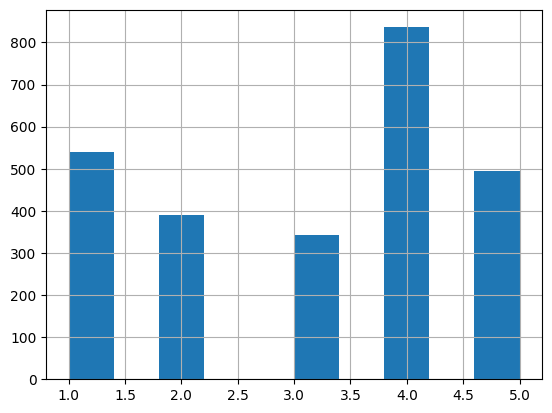

In [15]:
evasao_with_label['mc_cat'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Como eu estou tratando de um recorte do dataset original preciso resetar os index
evasao_with_label = evasao_with_label.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(evasao_with_label, evasao_with_label['mc_cat']):
    strat_train_set = evasao_with_label.loc[train_index]
    strat_test_set = evasao_with_label.loc[test_index]

In [17]:
# Confirmando que existe uma boa divisão entre os estratos
strat_test_set['mc_cat'].value_counts() / len(strat_test_set)

mc_cat
4    0.320537
1    0.207294
5    0.190019
2    0.149712
3    0.132438
Name: count, dtype: float64

In [18]:
# Removendo a coluna de categoria para o dataset voltar ao estado original
for set_ in (strat_test_set, strat_train_set):
    set_.drop('mc_cat', axis=1, inplace=True)

In [19]:
## Fazendo uma copia do modelo de treino
evasion = strat_train_set.copy()

### Procurando por correlação utilizando o curriculum status através do status_num(0 significa cancelado, 1 significa concluído)

In [20]:
evasion_numeric = evasion.select_dtypes(include=["number"])

corr_matrix = evasion_numeric.corr()

corr_matrix["status_num"].sort_values(ascending=False)

status_num                       1.000000
iech                             0.577856
iepl                             0.517556
iea                              0.509750
mc                               0.477843
required_ch_progress             0.439484
optative_ch_progress             0.237832
course_mc                       -0.014020
course_iech                     -0.014967
course_iepl                     -0.014987
locks_number                    -0.154489
student_age_at_initial_period   -0.199262
Name: status_num, dtype: float64

In [21]:
# Vou remover alguns valores que não vejo sentido continuar usando, já que são equialentes ao course_name
columns_to_drop = ['course_iepl', 'course_mc', 'course_iech']
evasion = evasion.drop(columns=[col for col in columns_to_drop if col in evasion.columns])

### Plotar alguns valores promissores

array([[<Axes: xlabel='iech', ylabel='iech'>,
        <Axes: xlabel='iea', ylabel='iech'>,
        <Axes: xlabel='iepl', ylabel='iech'>,
        <Axes: xlabel='mc', ylabel='iech'>],
       [<Axes: xlabel='iech', ylabel='iea'>,
        <Axes: xlabel='iea', ylabel='iea'>,
        <Axes: xlabel='iepl', ylabel='iea'>,
        <Axes: xlabel='mc', ylabel='iea'>],
       [<Axes: xlabel='iech', ylabel='iepl'>,
        <Axes: xlabel='iea', ylabel='iepl'>,
        <Axes: xlabel='iepl', ylabel='iepl'>,
        <Axes: xlabel='mc', ylabel='iepl'>],
       [<Axes: xlabel='iech', ylabel='mc'>,
        <Axes: xlabel='iea', ylabel='mc'>,
        <Axes: xlabel='iepl', ylabel='mc'>,
        <Axes: xlabel='mc', ylabel='mc'>]], dtype=object)

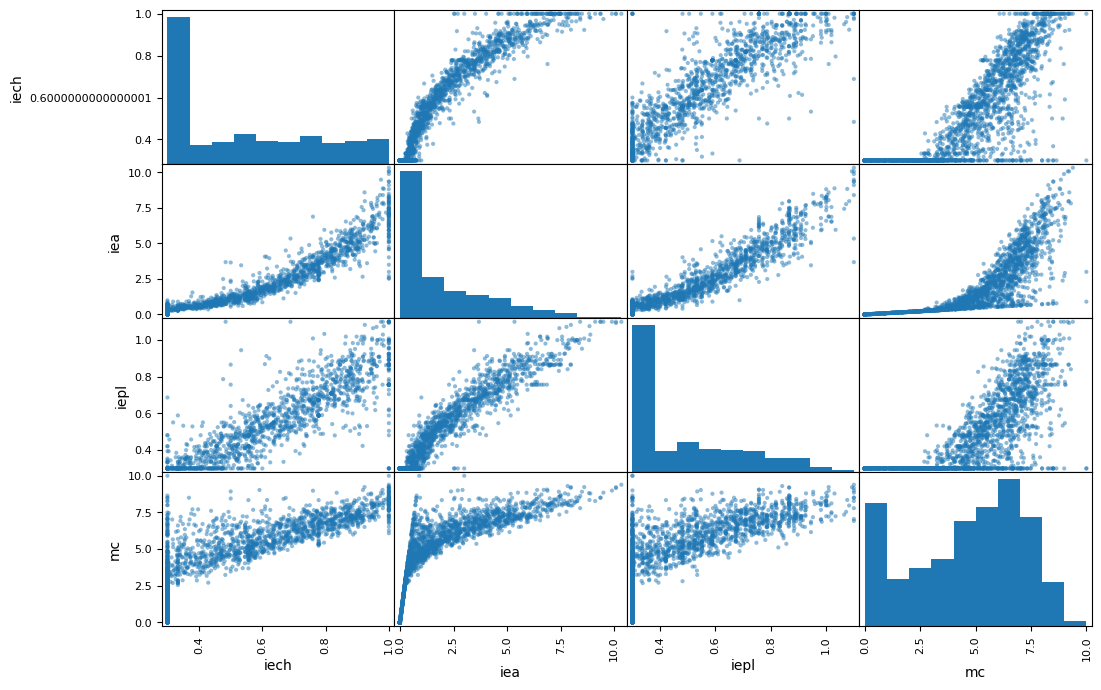

In [22]:
from pandas.plotting import scatter_matrix

attributes = ['iech', 'iea', 'iepl', 'mc']
scatter_matrix(evasion[attributes], figsize=(12, 8))

<Axes: xlabel='status_num', ylabel='mc'>

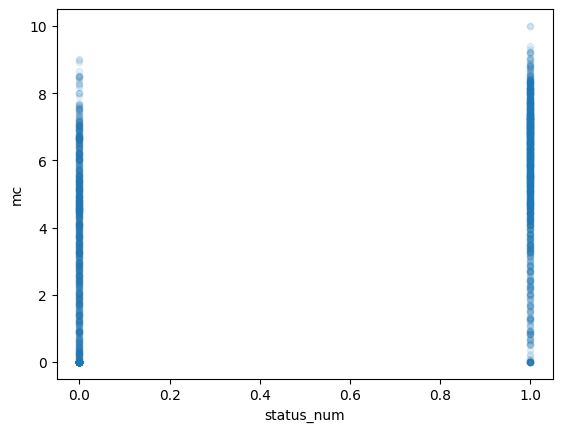

In [23]:
# Alunos que não evadem se acumulam com MC > 4, enquanto os que evdem se acumulam com MC < 7
evasion.plot(kind='scatter', x='status_num', y='mc', alpha=0.1)

## Preparando os dados para algoritmos de ML

In [24]:
# Removendo a coluna de label já que não vamos alterar ela
evasion = strat_train_set.drop('status_num', axis=1)
evasion_labels = strat_train_set['status_num'].copy()

In [25]:
# preenchendo os birth_place que foram nulos
evasion['birth_place'] = evasion['birth_place'].fillna('Desconhecido')

print(evasion['birth_place'].isna().sum())

0


#### Convertendo valores categóricos

In [26]:
# Separando os valores categórios e os númericos
evasion_cat = evasion[['course_name', 'birth_place', 'ingress_form']]
evasion_num = evasion.drop(['course_name', 'birth_place', 'ingress_form'], axis=1)

#### Criando as funções para transformações categóricas e númericas serem aplicadas em um pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Transformação categórica
cat_encoder = OneHotEncoder()
# evasion_cat_1hot = cat_encoder.fit_transform(evasion_cat)
# evasion_cat_1hot

# Númerica
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# evasion_num_tr = num_pipeline.fit_transform(evasion_num)

### Utilizando um transformer para valores categóricos e númericos

In [28]:
from sklearn.compose import ColumnTransformer

num_attribs = list(evasion_num)
cat_attribs = list(evasion_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])

evasion_prepared = full_pipeline.fit_transform(evasion)

### Selecionar e treinar um modelo, vou começar testando o comportamento de um modelo de regressão linear em um problema de classificação

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(evasion_prepared, evasion_labels)

LinearRegression()

In [30]:
some_data = evasion.iloc[:5]
some_labels = evasion_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 0.2381932   0.99978265  0.9923838  -0.0037323   0.79103012]
Labels: [0, 1, 1, 0, 1]


### Como esperado, as predições são valores, para avilar perfomance em modelos de regressão linear é utilizado o Root Mean Square Error

In [31]:
from sklearn.metrics import mean_squared_error
evasion_predictions = lin_reg.predict(evasion_prepared)
lin_mse = mean_squared_error(evasion_labels, evasion_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.37235882157292577)

## Agora vamos testar modelos de classificação

##### Classificação baseada em regressão linear LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lin_log = LogisticRegression()
lin_log.fit(evasion_prepared, evasion_labels)

LogisticRegression()

In [33]:
some_data = evasion.iloc[:500]
some_labels = evasion_labels.iloc[:500]
some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_log.predict(some_data_prepared)
regressao_accuracy = accuracy_score(some_labels, predictions)
print(regressao_accuracy)

0.78


#### Utilizando árvores de decisão

In [34]:
from sklearn.tree import DecisionTreeClassifier


tree_class = DecisionTreeClassifier()
tree_class.fit(evasion_prepared, evasion_labels)

DecisionTreeClassifier()

In [35]:
predictions = tree_class.predict(evasion_prepared)
tree_accuracy = accuracy_score(evasion_labels, predictions)

print(f"Accuracy: {tree_accuracy:f}")

Accuracy: 0.999520


In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_class, evasion_prepared, evasion_labels, scoring="neg_mean_squared_error", cv=5)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

display_scores(-scores)


Scores: [0.25179856 0.24460432 0.21875    0.24519231 0.24759615]
Mean: 0.24158826784726067
Std: 0.01169629783094951


#### Utilizando florestas de decisão

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators=10, random_state=42)
forest_class.fit(evasion_prepared, evasion_labels)

RandomForestClassifier(n_estimators=10, random_state=42)

In [38]:
some_data = evasion.iloc[:500]
some_labels = evasion_labels.iloc[:500]
some_data_prepared = full_pipeline.transform(some_data)
forest_predictions = forest_class.predict(some_data_prepared)

forest_accuracy = accuracy_score(some_labels, forest_predictions)

print(f"Accuracy: {forest_accuracy:f}")
print("Predictions:", predictions[490:])
print("Labels:", list(some_labels[490:]))


Accuracy: 0.990000
Predictions: [1 1 0 ... 1 0 0]
Labels: [1, 1, 0, 1, 0, 1, 0, 1, 1, 1]


#### Utilizando modelo de k-neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier(n_neighbors=5)
k_neigh.fit(evasion_prepared, evasion_labels)

KNeighborsClassifier()

In [40]:
some_data = evasion.iloc[:500]
some_labels = evasion_labels.iloc[:500]
some_data_prepared = full_pipeline.transform(some_data)
predictions = k_neigh.predict(some_data_prepared)
k_accuracy = accuracy_score(some_labels, predictions)
print(k_accuracy)

0.848


### comparação do resultados dos modelos

In [41]:
print(f'regressao_accuracy:', regressao_accuracy)
print(f'tree_accuracy:', tree_accuracy)
print(f'forest_accuracy:', forest_accuracy)
print(f'k accuracy:', k_accuracy)

regressao_accuracy: 0.78
tree_accuracy: 0.9995196926032661
forest_accuracy: 0.99
k accuracy: 0.848
